In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
data=pd.read_csv('diabetes_dataset.csv')
data=data.drop(columns='PatientID')
data=data.drop(columns='Gender')

In [4]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       100 non-null    int64  
 1   BMI                       100 non-null    float64
 2   BloodPressure             100 non-null    int64  
 3   Insulin                   100 non-null    int64  
 4   Glucose                   100 non-null    int64  
 5   DiabetesPedigreeFunction  100 non-null    float64
 6   Outcome                   100 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 5.6 KB


In [6]:
data.isna().sum().sum()

0

<Axes: >

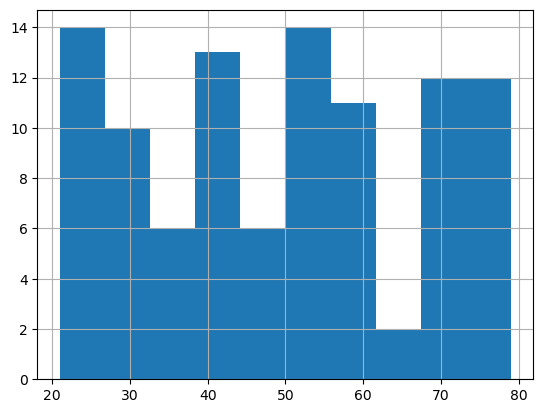

In [7]:
data['Age'].hist()

<Axes: xlabel='Outcome'>

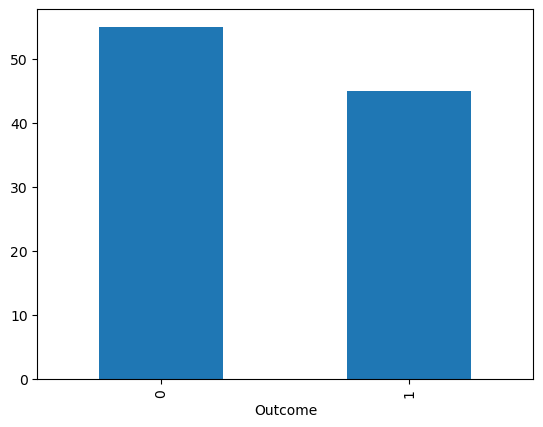

In [8]:
data['Outcome'].value_counts().plot(kind='bar')

<Axes: xlabel='Outcome', ylabel='BMI'>

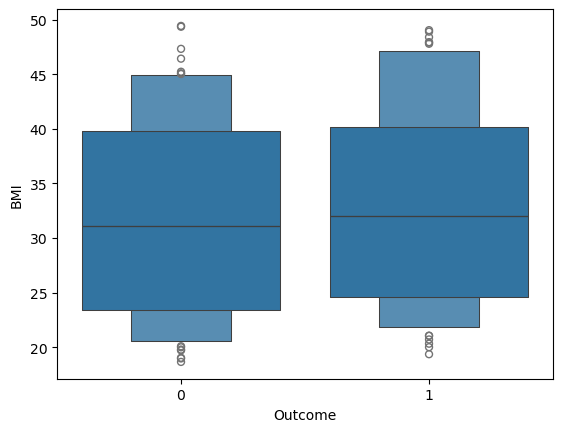

In [9]:
sns.boxenplot(x='Outcome',y='BMI',data=data)

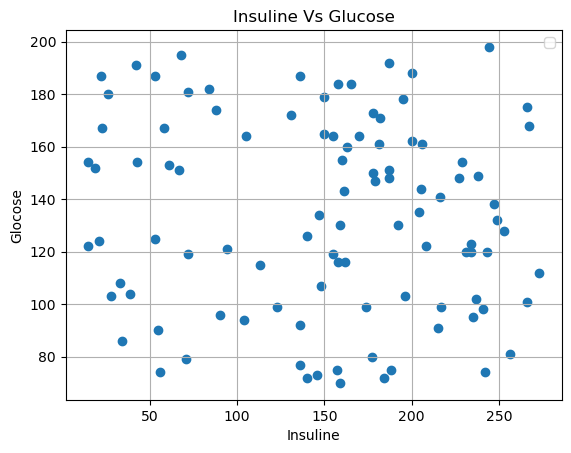

In [10]:
plt.scatter(data['Insulin'],data['Glucose'])
plt.xlabel('Insuline')
plt.ylabel('Glocose')
plt.title('Insuline Vs Glucose')
plt.grid(True)
plt.legend()
plt.show()

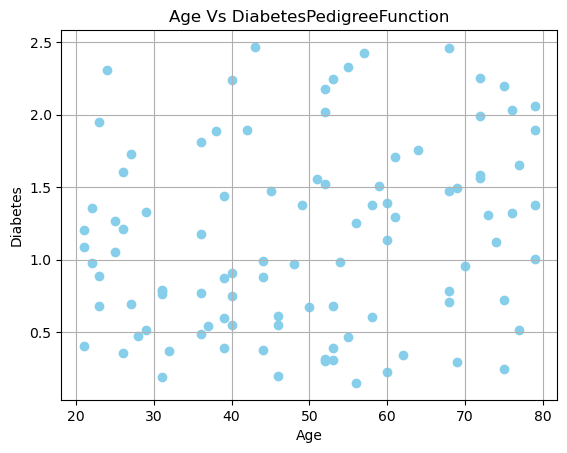

In [11]:
plt.scatter(data['Age'],data['DiabetesPedigreeFunction'],color='skyblue')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Age Vs DiabetesPedigreeFunction')
plt.grid(True)
plt.show()

In [12]:
data.columns

Index(['Age', 'BMI', 'BloodPressure', 'Insulin', 'Glucose',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

In [13]:
sns.pairplot(data[['Age','Gender','BMI','BloodPressure','Insulin','Glucose','DiabetesPedigreeFunction','Outcome']],hue='Outcome')

KeyError: "['Gender'] not in index"

<Axes: >

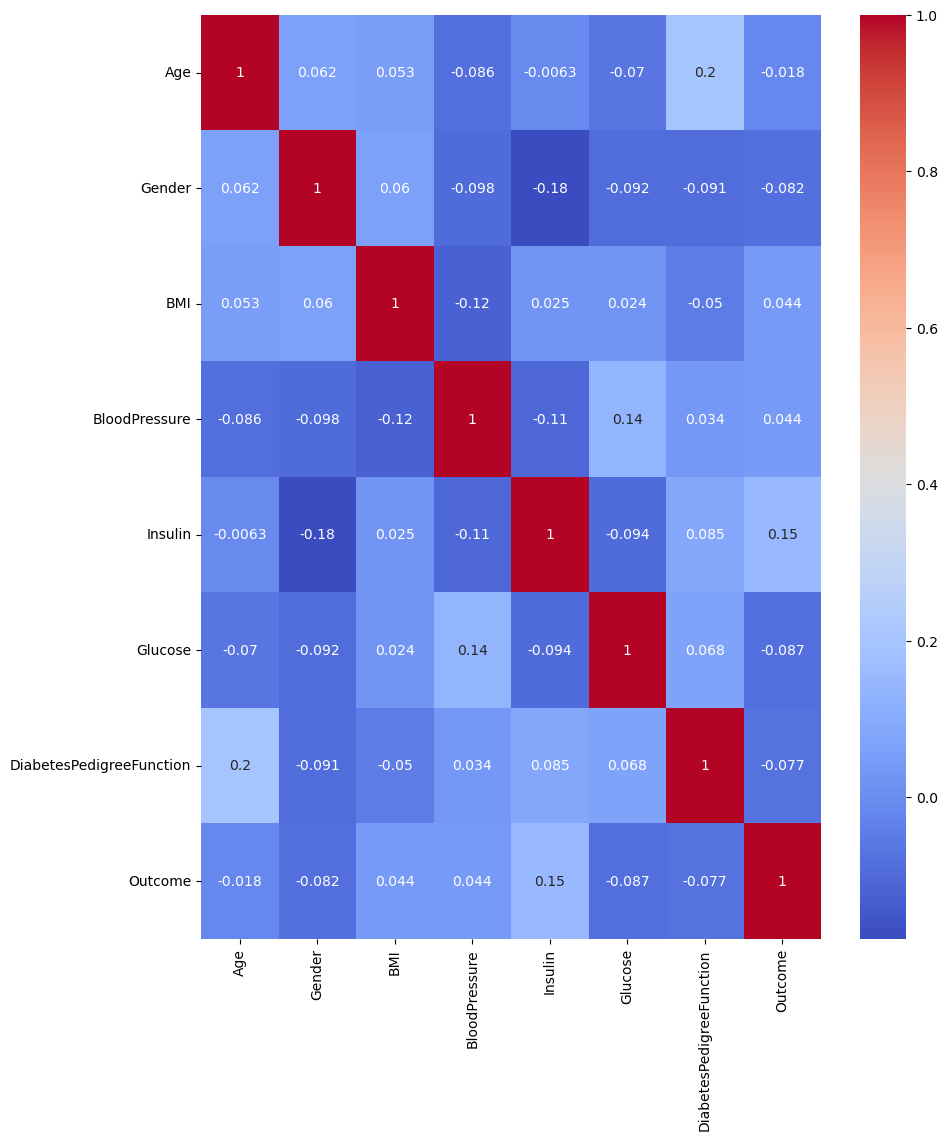

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

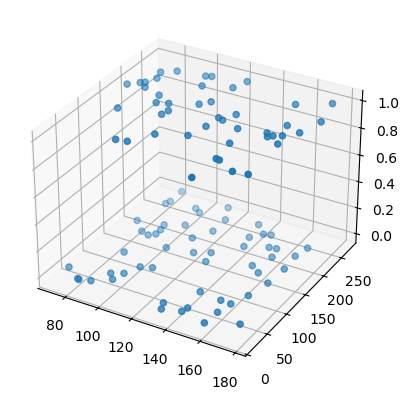

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['BloodPressure'], data['Insulin'], data['Outcome'])


In [ ]:
y= data.drop('Outcome', axis=1)
X=data['Outcome']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split your data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
DTC = DecisionTreeClassifier(max_depth=10,min_samples_split=5,random_state=42)
DTC.fit(X_train, y_train) 

# Predict on the test set
y_pred = DTC.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))


Accuracy: 0.65
f1_score 0.631578947368421
precision_score 0.6


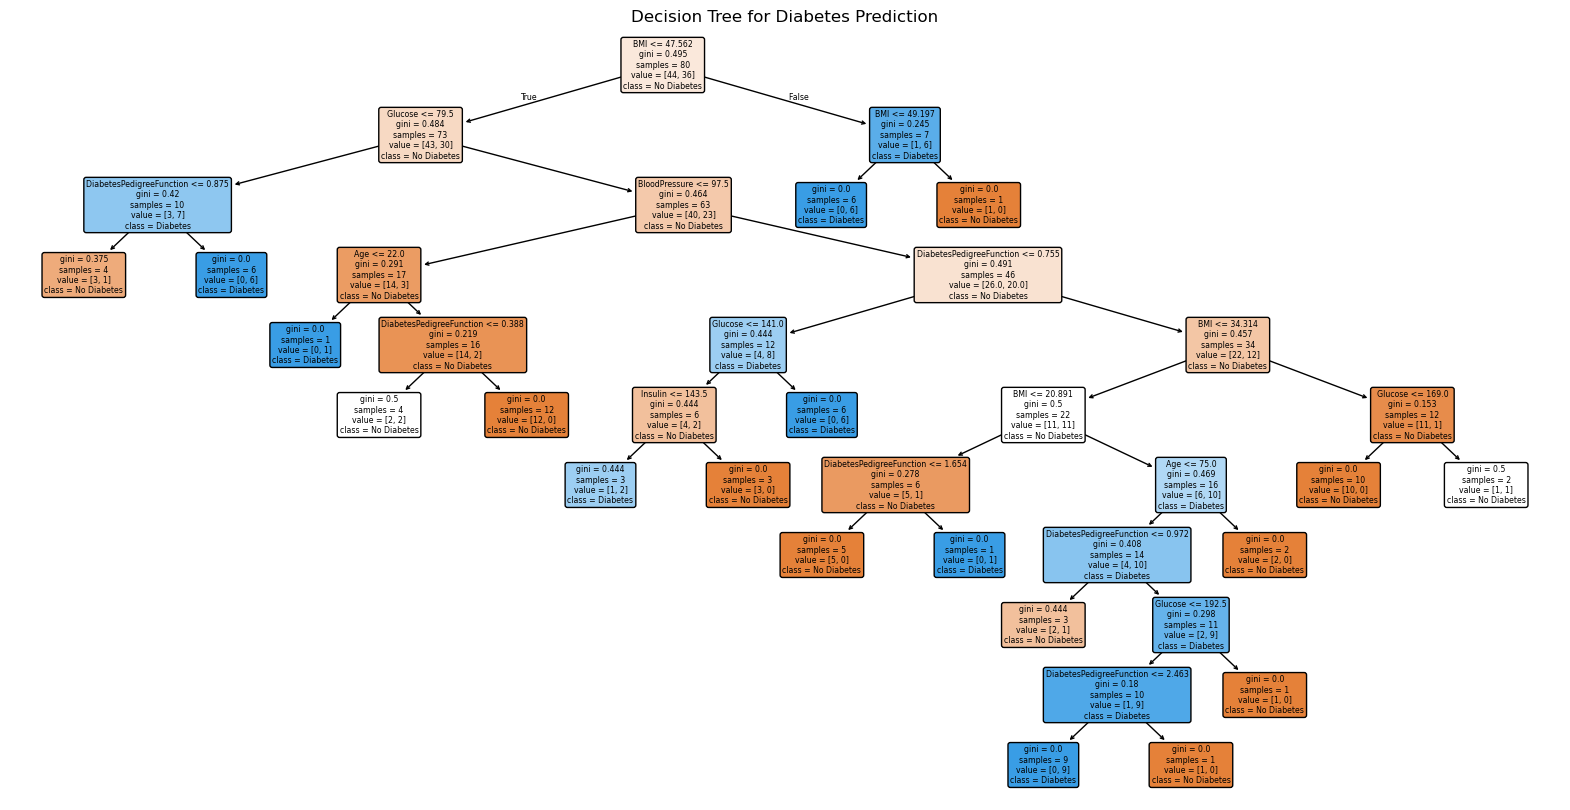

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(DTC, 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree for Diabetes Prediction")
plt.show()